# NBA Ratings EDA & Neural Network Model

In [1]:
#Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import tensorflow as tf
import os
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow import keras
from tensorflow.keras import layers


In [2]:
dfNBA = pd.read_csv('Resources/nba_rankings_2014-2020.csv')

In [3]:
dfNBA.head()

,Unnamed: 0,PLAYER,TEAM,AGE,SEASON,GP,W,L,MIN,PTS,...,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,rankings
0,0,Aaron Gordon,ORL,24,2019-20,62,30,32,32.5,14.4,...,3.7,1.6,0.8,0.6,2.0,31.9,20.0,1.0,-1.1,80.0
1,1,Aaron Holiday,IND,23,2019-20,66,42,24,24.5,9.5,...,3.4,1.3,0.8,0.2,1.8,19.3,3.0,0.0,1.7,76.0
2,2,Abdel Nader,OKC,26,2019-20,55,37,18,15.8,6.3,...,0.7,0.8,0.4,0.4,1.4,11.1,0.0,0.0,-1.5,71.0
3,3,Adam Mokoka,CHI,21,2019-20,11,3,8,10.2,2.9,...,0.4,0.2,0.4,0.0,1.5,5.5,0.0,0.0,4.5,68.0
4,4,Admiral Schofield,WAS,23,2019-20,33,9,24,11.2,3.0,...,0.5,0.2,0.2,0.1,1.5,6.3,0.0,0.0,-1.7,71.0


In [4]:
dfNBA.shape

(2412, 32)

In [5]:
dfNBA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2412 entries, 0 to 2411
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2412 non-null   int64  
 1   PLAYER      2412 non-null   object 
 2   TEAM        2412 non-null   object 
 3   AGE         2412 non-null   int64  
 4   SEASON      2412 non-null   object 
 5   GP          2412 non-null   int64  
 6   W           2412 non-null   int64  
 7   L           2412 non-null   int64  
 8   MIN         2412 non-null   float64
 9   PTS         2412 non-null   float64
 10  FGM         2412 non-null   float64
 11  FGA         2412 non-null   float64
 12  FG%         2412 non-null   float64
 13  3PM         2412 non-null   float64
 14  3PA         2412 non-null   float64
 15  3P%         2412 non-null   float64
 16  FTM         2412 non-null   float64
 17  FTA         2412 non-null   float64
 18  FT%         2412 non-null   float64
 19  OREB        2412 non-null  

In [6]:
duplicate_rows_df = dfNBA[dfNBA.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape )

number of duplicate rows:  (0, 32)


In [7]:
dfNBA.describe()

,Unnamed: 0,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,...,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,rankings
count,2412.000000,2412.000000,2412.000000,2412.000000,2412.000000,2412.000000,2412.000000,2412.000000,2412.000000,2412.000000,...,2412.000000,2412.000000,2412.000000,2412.000000,2412.000000,2412.000000,2412.000000,2412.000000,2412.000000,2412.000000
mean,339.196103,26.314677,55.381012,27.982172,27.398839,21.516086,9.445149,3.502239,7.693615,45.132546,...,2.040547,1.226658,0.689096,0.442786,1.839096,19.423839,5.009121,0.236318,-0.114594,75.656716
std,200.470761,4.148336,22.816590,15.299014,13.728032,8.762708,6.028712,2.161709,4.574182,8.848778,...,1.825906,0.812183,0.422630,0.437123,0.723557,10.780126,10.114069,1.708944,3.004522,5.797701
min,0.000000,19.000000,1.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-18.000000,62.000000
25%,170.000000,23.000000,40.000000,16.000000,17.000000,14.900000,5.000000,1.900000,4.200000,40.875000,...,0.800000,0.700000,0.400000,0.200000,1.400000,11.600000,0.000000,0.000000,-1.900000,72.000000
50%,336.500000,26.000000,62.000000,28.000000,28.000000,21.500000,8.000000,3.000000,6.700000,44.500000,...,1.500000,1.000000,0.600000,0.300000,1.900000,17.500000,1.000000,0.000000,-0.200000,75.000000
75%,509.250000,29.000000,74.000000,40.000000,37.000000,28.900000,12.800000,4.800000,10.600000,49.000000,...,2.600000,1.600000,0.900000,0.600000,2.300000,25.700000,5.000000,0.000000,1.500000,78.000000
max,795.000000,41.000000,83.000000,73.000000,68.000000,38.700000,36.100000,10.900000,24.500000,100.000000,...,11.700000,5.700000,2.400000,3.700000,5.000000,60.600000,69.000000,42.000000,13.200000,98.000000


In [8]:
dfNBA.isna().sum()

Unnamed: 0    0
PLAYER        0
TEAM          0
AGE           0
SEASON        0
GP            0
W             0
L             0
MIN           0
PTS           0
FGM           0
FGA           0
FG%           0
3PM           0
3PA           0
3P%           0
FTM           0
FTA           0
FT%           0
OREB          0
DREB          0
REB           0
AST           0
TOV           0
STL           0
BLK           0
PF            0
FP            0
DD2           0
TD3           0
+/-           0
rankings      0
dtype: int64

In [9]:
dfNBA.head()

,Unnamed: 0,PLAYER,TEAM,AGE,SEASON,GP,W,L,MIN,PTS,...,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,rankings
0,0,Aaron Gordon,ORL,24,2019-20,62,30,32,32.5,14.4,...,3.7,1.6,0.8,0.6,2.0,31.9,20.0,1.0,-1.1,80.0
1,1,Aaron Holiday,IND,23,2019-20,66,42,24,24.5,9.5,...,3.4,1.3,0.8,0.2,1.8,19.3,3.0,0.0,1.7,76.0
2,2,Abdel Nader,OKC,26,2019-20,55,37,18,15.8,6.3,...,0.7,0.8,0.4,0.4,1.4,11.1,0.0,0.0,-1.5,71.0
3,3,Adam Mokoka,CHI,21,2019-20,11,3,8,10.2,2.9,...,0.4,0.2,0.4,0.0,1.5,5.5,0.0,0.0,4.5,68.0
4,4,Admiral Schofield,WAS,23,2019-20,33,9,24,11.2,3.0,...,0.5,0.2,0.2,0.1,1.5,6.3,0.0,0.0,-1.7,71.0


In [10]:
dfNBAtrain = dfNBA[(dfNBA.SEASON != '2019-20')]
dfNBAtest = dfNBA[(dfNBA.SEASON == '2019-20')]

In [11]:
dfNBAtrain.shape

(1905, 32)

In [12]:
dfNBAtest.shape

(507, 32)

In [13]:
train_dataset_all = dfNBAtrain.sample(frac=0.8, random_state=0)
test_dataset_all = dfNBAtest.copy()

In [14]:
# Drop the non-beneficial ID columns
train_dataset = train_dataset_all.drop(columns=["PLAYER", "TEAM", "SEASON", "Unnamed: 0"], axis=1)
test_dataset = test_dataset_all.drop(columns=["PLAYER", "TEAM", "SEASON", "Unnamed: 0"], axis=1)

In [15]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('rankings')
test_labels = test_features.pop('rankings')

In [16]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
AGE,26.459318,4.151472
GP,58.973753,21.350112
W,29.842520,14.908348
L,29.131234,13.533833
MIN,22.046194,8.516270
PTS,9.582612,5.817381
FGM,3.557415,2.083870
FGA,7.829856,4.447595
FG%,45.236811,8.348555
3PM,0.870997,0.776433


In [17]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [18]:
normalizer.adapt(np.array(train_features))

In [19]:
minutes = np.array(train_features['MIN'])
minutes_normalizer = layers.Normalization(input_shape=[1,], axis=None)
minutes_normalizer.adapt(minutes)

In [20]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [21]:
linear_model.predict(train_features)

array([[ 1.1203494],
       [ 1.5731497],
       [ 0.1280437],
       ...,
       [-1.6092252],
       [-1.1153879],
       [ 1.0622368]], dtype=float32)

In [22]:
linear_model.layers[1].kernel

<tf.Variable 'dense/kernel:0' shape=(27, 1) dtype=float32, numpy=
array([[-0.01388696],
       [-0.34491485],
       [ 0.24244666],
       [-0.31096727],
       [ 0.09191233],
       [-0.11211401],
       [ 0.02967629],
       [ 0.1026448 ],
       [ 0.26773155],
       [-0.14157686],
       [ 0.14858967],
       [-0.22451055],
       [ 0.26411915],
       [-0.06357202],
       [ 0.34211737],
       [ 0.27097487],
       [ 0.1857211 ],
       [ 0.06343216],
       [ 0.45940274],
       [-0.07458967],
       [-0.36834806],
       [-0.42152974],
       [-0.24836415],
       [ 0.19338888],
       [ 0.42068088],
       [ 0.09223187],
       [-0.17575732]], dtype=float32)>

In [23]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [24]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Wall time: 3.19 s


In [25]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Rating]')
  plt.legend()
  plt.grid(True)

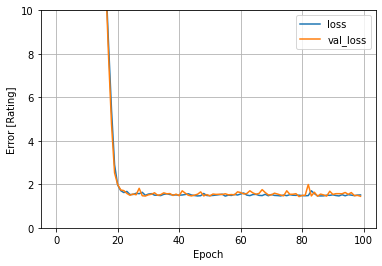

In [26]:
plot_loss(history)

In [27]:
test_results = {}

test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

In [28]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [29]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 27)               55        
 n)                                                              
                                                                 
 dense_1 (Dense)             (None, 64)                1792      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6,072
Trainable params: 6,017
Non-trainable params: 55
_________________________________________________________________


In [30]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

Wall time: 4.29 s


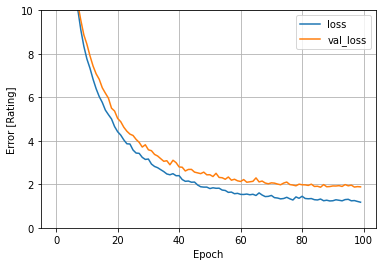

In [31]:
plot_loss(history)

In [32]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [33]:
pd.DataFrame(test_results, index=['Mean absolute error [Rating]']).T

,Mean absolute error [Rating]
linear_model,1.438754
dnn_model,1.926001


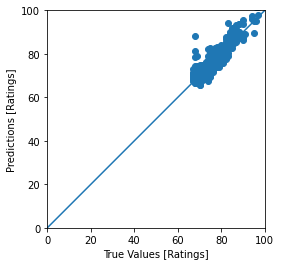

In [34]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Ratings]')
plt.ylabel('Predictions [Ratings]')
lims = [0, 100]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

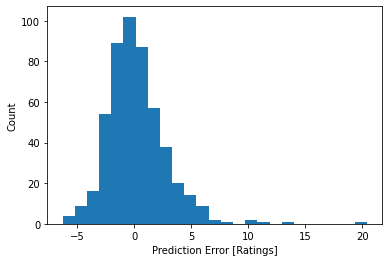

In [35]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [Ratings]')
_ = plt.ylabel('Count')

In [36]:
dnn_model.save('dnn_model')

INFO:tensorflow:Assets written to: dnn_model\assets


In [37]:
reloaded = tf.keras.models.load_model('dnn_model')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)

In [38]:
pd.DataFrame(test_results, index=['Mean absolute error Ratings']).T

,Mean absolute error Ratings
linear_model,1.438754
dnn_model,1.926001
reloaded,1.926001


In [39]:
testdf = pd.concat([test_features,test_labels], axis=1)

In [40]:
testdf

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,...,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,rankings
0,24,62,30,32,32.5,14.4,5.4,12.4,43.7,1.2,...,3.7,1.6,0.8,0.6,2.0,31.9,20.0,1.0,-1.1,80.0
1,23,66,42,24,24.5,9.5,3.5,8.5,41.4,1.3,...,3.4,1.3,0.8,0.2,1.8,19.3,3.0,0.0,1.7,76.0
2,26,55,37,18,15.8,6.3,2.2,4.8,46.8,0.9,...,0.7,0.8,0.4,0.4,1.4,11.1,0.0,0.0,-1.5,71.0
3,21,11,3,8,10.2,2.9,1.1,2.5,42.9,0.5,...,0.4,0.2,0.4,0.0,1.5,5.5,0.0,0.0,4.5,68.0
4,23,33,9,24,11.2,3.0,1.1,2.8,38.0,0.6,...,0.5,0.2,0.2,0.1,1.5,6.3,0.0,0.0,-1.7,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,25,60,20,40,34.8,25.5,9.0,20.0,45.0,3.1,...,4.2,3.4,1.5,0.5,2.2,40.0,2.0,0.0,-3.2,85.0
503,22,5,2,3,8.2,2.0,0.6,2.4,25.0,0.6,...,0.6,0.6,0.4,0.0,0.8,4.9,0.0,0.0,-5.4,68.0
504,21,7,3,4,4.6,1.1,0.4,1.6,27.3,0.0,...,0.3,0.3,0.4,0.0,0.6,2.9,0.0,0.0,-1.4,70.0
505,19,24,11,13,27.8,22.5,8.8,15.0,58.3,0.3,...,2.1,2.5,0.7,0.4,1.8,33.8,2.0,0.0,2.6,86.0


In [41]:
test_dataset_all.drop(test_features, axis=1, inplace=True)

In [42]:
test_dataset_all.drop(['Unnamed: 0', 'rankings'], axis=1)

,PLAYER,TEAM,SEASON
0,Aaron Gordon,ORL,2019-20
1,Aaron Holiday,IND,2019-20
2,Abdel Nader,OKC,2019-20
3,Adam Mokoka,CHI,2019-20
4,Admiral Schofield,WAS,2019-20
...,...,...,...
502,Zach LaVine,CHI,2019-20
503,Zach Norvell Jr.,GSW,2019-20
504,Zhaire Smith,PHI,2019-20
505,Zion Williamson,NOP,2019-20


In [43]:
testdf = pd.DataFrame.merge(testdf,test_dataset_all,left_index=True, right_index=True)

In [44]:
testdf.reset_index(drop=True,inplace=True)

In [45]:
preddf = pd.DataFrame(test_predictions)

In [46]:
nbatestpred = pd.DataFrame.merge(testdf,preddf, left_index=True, right_index=True)

In [47]:
nbatestpred.drop(['rankings_x', 'Unnamed: 0'], axis=1, inplace=True)

In [48]:
nbatestpred.rename(columns={'rankings_y': 'rankings'}, inplace=True)

In [49]:
nbatestpred

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,...,PF,FP,DD2,TD3,+/-,PLAYER,TEAM,SEASON,rankings,0
0,24,62,30,32,32.5,14.4,5.4,12.4,43.7,1.2,...,2.0,31.9,20.0,1.0,-1.1,Aaron Gordon,ORL,2019-20,80.0,75.919800
1,23,66,42,24,24.5,9.5,3.5,8.5,41.4,1.3,...,1.8,19.3,3.0,0.0,1.7,Aaron Holiday,IND,2019-20,76.0,75.017441
2,26,55,37,18,15.8,6.3,2.2,4.8,46.8,0.9,...,1.4,11.1,0.0,0.0,-1.5,Abdel Nader,OKC,2019-20,71.0,72.053925
3,21,11,3,8,10.2,2.9,1.1,2.5,42.9,0.5,...,1.5,5.5,0.0,0.0,4.5,Adam Mokoka,CHI,2019-20,68.0,72.027512
4,23,33,9,24,11.2,3.0,1.1,2.8,38.0,0.6,...,1.5,6.3,0.0,0.0,-1.7,Admiral Schofield,WAS,2019-20,71.0,67.919304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,25,60,20,40,34.8,25.5,9.0,20.0,45.0,3.1,...,2.2,40.0,2.0,0.0,-3.2,Zach LaVine,CHI,2019-20,85.0,89.155746
503,22,5,2,3,8.2,2.0,0.6,2.4,25.0,0.6,...,0.8,4.9,0.0,0.0,-5.4,Zach Norvell Jr.,GSW,2019-20,68.0,70.067551
504,21,7,3,4,4.6,1.1,0.4,1.6,27.3,0.0,...,0.6,2.9,0.0,0.0,-1.4,Zhaire Smith,PHI,2019-20,70.0,69.717751
505,19,24,11,13,27.8,22.5,8.8,15.0,58.3,0.3,...,1.8,33.8,2.0,0.0,2.6,Zion Williamson,NOP,2019-20,86.0,91.222504


In [50]:
nbatestpred.to_csv('NBATestPred.csv')